In [506]:
import networkx as nx

In [507]:
graph = nx.Graph()

In [508]:
import math
from heapq import heappush, heappop
from datetime import datetime

In [509]:
class KDNode():
    
    def __init__(self, x, y):
        self.cord = (x,y);
        
        self.lc = None;
        self.rc = None;
        self.p = None;
        self.dist = None;
        
    def getValue(self, key):
        if self.key == key:
            return self.value
        elif self.key > key and self.lc is not None:
            return self.lc.getValue(key)
        elif self.key < key and self.rc is not None:
            return self.rc.getValue(key)
        else:
            return None

        

        
        
    def insert(self, node, h = 0):
        #determine dimensionality of the layer of tree
        dim = h%2
            
        if self.cord[dim] > node.cord[dim]:
            
            #new node is smaller -> left side
            if self.lc:
                #left node exists --> call insert on that node and increment depth
                self.lc.insert(node, h+ 1)
            else:
                #no left node --> new left node
                self.lc = node
                self.lc.p = self
        else:
            #new node is bigger --> right side
            if self.rc:
                #right node exists --> call insert on that node and increment depth
                self.rc.insert(node, h + 1)
                
            else:
                #no right node --> new right node
                self.rc = node
                self.rc.p = self
        
        
    
        
    
    
    def near(self, node, h = 0):
        #determine dimensionality of the layer of tree
        dim = h%2
            
        if self.cord[dim] > node.cord[dim]:
            #node to find is smaller -> left side
            
            if self.lc:
                #go down the left side and check all those values
                check = self.lc.near(node, h+ 1)
                self.dist = self.distBetween(node)
                
                #compare best so far
                if check.dist < self.dist:
                    if check.dist > abs(check.cord[dim] - node.cord[dim]):
                        if self.rc:
                            check2 = self.rc.near(node,h+1)
                            if check2.dist < check.dist:
                                return check2
                    return check
                else:
                    ###### edge case where the other side of the tree *may* be closer -- this comes up a few time ######
                    if self.dist > abs(self.cord[dim] - node.cord[dim]):
                        
                        if self.rc:
                            check = self.rc.near(node, h + 1)
                           
                            if check.dist < self.dist:
                                return check
                    return self
            else:
                self.dist = self.distBetween(node)
                ###### edge case where the other side of the tree *may* be closer -- this comes up a few time ######
                if self.dist > abs(self.cord[dim] - node.cord[dim]):
                    if self.rc:
                        check = self.rc.near(node, h + 1)
                    
                        if check.dist < self.dist:
                            return check
                
                return self
        else:
            if self.rc:
                #node to find is larger --> right side
                check = self.rc.near(node, h + 1)
                self.dist = self.distBetween(node)
                
                if check.dist < self.dist:
                    if check.dist > abs(check.cord[dim] - node.cord[dim]):
                        if self.lc:
                            check2 = self.lc.near(node,h+1)
                        
                            if check2.dist < check.dist:
                                return check2
                    return check
                else:
                    ###### edge case where the other side of the tree *may* be closer -- this comes up a few time ######
                    if self.dist > abs(self.cord[dim] - node.cord[dim]):
                        if self.lc:
                            check = self.lc.near(node, h+ 1)
                    

                            if check.dist < self.dist:
                                return check
                    return self
            else:
                ###### edge case where the other side of the tree *may* be closer -- this comes up a few time ######
                self.dist = self.distBetween(node)
                if self.dist > abs(self.cord[dim] - node.cord[dim]):
                    if self.lc:
                        check = self.lc.near(node, h+ 1)
                    

                        if check.dist < self.dist:
                            return check
                return self


    def distBetween(self, node):
        dist = math.dist(self.cord,node.cord)
        return dist
    
    
class KDTree():
    
    def __init__(self):
        self.root = None;
        self.nodeList = []
        
    def nearNeighbour(self, node):
        n = self.root.near(node)
        #print(n)
        return n
            
    def insert(self, node):
        if self.root:
            self.nodeList.append(node.cord)
            self.root.insert(node)
        else:
            self.nodeList.append(node.cord)
            self.root = node
            
    
        
    def printer(self, focus, h = 0):
        if focus:
            self.printer(focus.rc, h + 1)
            print('     ' * h+  '-- '+ str(focus.cord[0]) + " " + str(focus.cord[1]) )
            
            self.printer(focus.lc, h+ 1)
            
    def printOut(self):
        self.printer(self.root)
        print("___________________________________________________________________________________________")
        

In [510]:
#import os
#os.listdir()
transit = KDTree()

In [511]:
#take stop_id from stops, these will be our nodes/dict keys with coords
def getStops(graph,transit):
    stopList = []
    with open("stops.txt") as f:
        lines = f.readlines()
    
        for line in lines[1:]:
            data = [item.strip() for item in line.split(',')]
            
            graph.add_node(data[0], coord = (288*float(data[3]), 364*float(data[2])))
            ####~ Puts all the coords into a list
            transit.insert(KDNode(288*float(data[3]), 364*float(data[2])))
            

In [512]:
#graph.nodes()["10"]

In [513]:
#take stop_id from stop_times and add trip_id
#add edges here
def getEdges(graph):
    date_format = "%H:%M:%S"
    with open("stop_times.txt") as f:
        lines = f.readlines()
        i=0
        stops_by_trip = {}
    
        for line in lines[1:]:
            data = [item.strip() for item in line.split(',')]
            
            if data[0] in stops_by_trip:
                stops_by_trip[data[0]].append((data[1],data[2]))
            else:
                stops_by_trip[data[0]] = [(data[1],data[2])]
        
    for trip in stops_by_trip:
        i = 0
        j = 1
        while j<len(stops_by_trip[trip]):
            temp_time = datetime.strptime(stops_by_trip[trip][j][1], date_format) - datetime.strptime(stops_by_trip[trip][i][1], date_format)
            graph.add_edge(stops_by_trip[trip][i][0],stops_by_trip[trip][j][0], 
                           time = temp_time.total_seconds(), 
                           color = "black")
            i+=1
            j+=1


In [514]:
def dijkstras(graph, source, target):
    dist = {source:0}
    for node in graph.nodes("coord"): 
        if node[0] != source:
            #print(node[0])
            dist[node[0]] = 1e12
    #print(dist[source])
    prev = {}
    
    q = PriorityQueue()
    
    for node in graph.nodes("coord"):
        q.add(dist[node[0]],node[0])
    
    #print(q.get())
    while len(q.items) > 0:
        queue_item = q.get()
        if queue_item is None:
            break
        else:
            old_dist, v = queue_item
        
        #print(v)
        neighbors = graph.neighbors(v)
        #print(neighbors)
        for neigh in neighbors:
            #print(dist[v])
            new_dist = dist[v] + 1
            if new_dist < dist[neigh]:
                dist[neigh] = new_dist
                prev[neigh] = v
                q.add(new_dist, neigh)
    #print(prev)         
    return prev

In [515]:
class PriorityQueue():
    def __init__(self):
        self.items = []
        self.fresh = {}
        
    def add(self, rank, item):
        heappush(self.items, (rank,item))
        self.fresh[item] = rank
        
    def get(self):
        if len(self.items) > 0:
            rank, item = heappop(self.items)

            if rank == self.fresh[item]:
                return rank, item
            else:
                return self.get()
        else:
            return None

In [516]:
import matplotlib.pyplot as plt

In [554]:
def best_route(source,target):
    
    #initialize KD Tree and nx Graph
    tree = KDTree()
    graph = nx.Graph()
    
    #getting stops and edges from transit data
    getStops(graph,tree)
    getEdges(graph)
    
    #convert coordinate inputs to miles
    source0 = source[0]*288
    source1 = source[1]*364
    
    target0 = target[0]*288
    target1 = target[1]*364
    
    #walk time as the bird flies between source and target
    #value 180 chosen as it matches apple maps walk time between points most closely
    walk_time = math.dist((source0,source1),(target0,target1))*180
    
    #initialize counter to add up time between stops by bus. stored in edge attributes.
    counter = 0
    
    #using plt to set a size of our graph to more closely match everett map dimensions
    fig, ax = plt.subplots()
    ax.set_aspect("equal", adjustable = "box")
    
    #source node initialization. time is calculated as walk_time from source to nearest stop.
    graph.add_node('source', coord = (source0, source1))
    test = KDNode(source0, source1)
    
    close = [x for x,y in graph.nodes(data=True) if y['coord']==tree.nearNeighbour(test).cord]
    print(graph.nodes("coord")[close[0]])
    graph.add_edge('source', close[0], time = math.dist((source0,source1),graph.nodes("coord")[close[0]])*180, color = "g")
    
    
    #target node initialization. time is calculated as walk_time from target to nearest stop.
    graph.add_node('target', coord = (target0, target1))
    test2 = KDNode(target0, target1)
    
    close = [x for x,y in graph.nodes(data=True) if y['coord']==tree.nearNeighbour(test2).cord]
    graph.add_edge('target', close[0], time = math.dist((target0,target1),graph.nodes("coord")[close[0]])*180, color = "g")
    
    
    #pathfinding
    dijk_route = dijkstras(graph, "source", "target")
    
    
    dijk_route_list = []
    current = "target"

    
    while graph.nodes()[current]["coord"] != graph.nodes()["source"]["coord"]:
        #print(current)
        dijk_route_list.append(current)
        graph[current][dijk_route[current]]["color"] = "g"
        current = dijk_route[current]
    
    #set edge color to green to show path
    eColors = [graph[u][v]['color'] for u,v in graph.edges]
    
   
    dijk_route_list.reverse()
    
    i=0
    j=1
    while j < len(dijk_route_list):
        #some dictionary entries are in reverse order, try/except was added to handle this
        try:
            counter += nx.get_edge_attributes(graph, "time")[(dijk_route_list[i],dijk_route_list[j])]
        except:
            counter += nx.get_edge_attributes(graph, "time")[(dijk_route_list[j],dijk_route_list[i])]
        i+=1
        j+=1
    
    #coloring the nodes of the route
    color_map = []
    
    for node in graph.nodes("coord"):
        #print(node[1])
        if node[0] in dijk_route_list:
            
            color_map.append("Green")
            
        elif node[0] == "source" or node[0] == "target":
            
            color_map.append("Green")
        else:
            color_map.append("gray")     
    
    #printing walking time versus transit time in seconds
    print("DIRECTIONS FROM " + str(source) + " to " + str(target))
    print("Transit time: " + str(counter) + " seconds")
    print("Walk time: " + str(walk_time) + " seconds")
    
    #draw the graph
    nx.draw(graph, {node:graph.nodes()[node]["coord"] for node in graph.nodes()}, 
            node_color=color_map, 
            node_size=10, 
            #cmap=plt.cm.Greens, 
            edge_color = eColors,
            font_size = 4,
            ax = ax,
            )
    limits = plt.axis("on")
    ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
    

(-35197.875072, 17472.119392)
DIRECTIONS FROM (-122.27, 48) to (-122.18, 47.9)
Transit time: 3169.259303869173 seconds
Walk time: 8043.415155268344 seconds


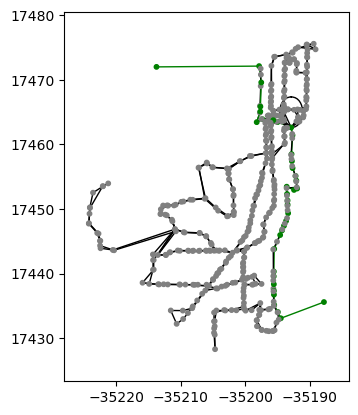

In [553]:
best_route((-122.27, 48),(-122.18, 47.9))


In [526]:
#dijkstra again but for a single point and distance to all nodes from there
def dijkstrasNoTarg(graph, source):
    dist = {source:0}
    for node in graph.nodes("coord"): 
        if node[0] != source:
            #print(node[0])
            dist[node[0]] = 1e12
    #print(dist[source])
    prev = {}
    
    q = PriorityQueue()
    
    for node in graph.nodes("coord"):
        q.add(dist[node[0]],node[0])
    
    while len(q.items) > 0:
        queue_item = q.get()
        if queue_item is None:
            break
        else:
            old_dist, v = queue_item
        
        neighbors = graph.neighbors(v)
        for neigh in neighbors:
            
            new_dist = dist[v] + 1 
            if new_dist < dist[neigh]:
                dist[neigh] = new_dist
                prev[neigh] = v
                q.add(new_dist, neigh)
            
    return dist

In [528]:
#coloring nodes from purple to yellow based on distance from a point
def color_dist_from_point(ids):
    
    
   
    
    tree = KDTree()
    graph = nx.Graph()
    
    getStops(graph,tree)
    getEdges(graph)
    
    
    
    
    
    fig, ax = plt.subplots()
    ax.set_aspect("equal", adjustable = "box")
    
   
    
    
    
    
    #Find the shortest route to every point and store it in a dictionary
    dijk_route = dijkstrasNoTarg(graph, ids)
    
   
    
    
    
    eColors = [graph[u][v]['color'] for u,v in graph.edges]
    
    
    
    nx.draw(graph, {node:graph.nodes()[node]["coord"] for node in graph.nodes()}, 
            node_color=[dijk_route[node] for node in graph.nodes()], 
            node_size=10, 
            #cmap=plt.cm.Greens, 
            edge_color = eColors,
            font_size = 4,
            ax = ax,
            )
    limits = plt.axis("on")
    ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)

In [533]:
#color_dist_from_point('9296')